In [3]:
from ipfn import ipfn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [4]:
os.chdir('/Users/siggahalldorsdottir/Documents/THESIS/Code/Data')

In [34]:
income_marginal = pd.read_csv('INDKP105_code.csv', sep=';')
session = pd.read_csv('session.csv')
session['RespSex'] = session.RespSex.astype('category').cat.rename_categories({1.: 'M', 2.: 'K'})
session_all = session.copy()
session = session[['RespSex', 'HomeAdrMunCode']]

In [44]:
income_col = pd.DataFrame(session_all['IncRespondent2000'].dropna())

In [31]:
income_value = pd.read_csv('INDKP105_value.csv', sep=';')

In [33]:
income_value['INDKINTB'].unique()

array(['Under 25,000 DKK', '25,000 - 49,999 DKK', '50,000 - 74,999 DKK',
       '75,000 - 99,999 DKK', '100,000 - 124,999 DKK',
       '125,000 - 149,999 DKK', '150,000 - 174,999 DKK',
       '175,000 - 199,999 DKK', '200,000 - 224,999 DKK',
       '225,000 - 249,999 DKK', '250,000 - 299,999 DKK',
       '300,000 - 349,999 DKK', '350,000 - 399,999 DKK',
       '400,000 - 449,999 DKK', '450,000 - 499,999 DKK',
       '500,000 DKK and more'], dtype=object)

In [6]:
session = session[['RespSex', 'HomeAdrMunCode']]

In [7]:
#session = session.loc[session['HomeAdrMunCode'].isin([751, 657, 779, 540, 410])]

In [8]:
session = session.loc[session['HomeAdrMunCode'].isin([751, 657, 779, 540, 410, 147, 169, 219, 190, 360, 253, 530, 851,
       615, 376, 630, 259, 813, 165, 101, 306, 210, 575, 336, 461, 230,
       159, 840, 183, 185, 561, 350, 706, 621, 810, 173, 580, 250, 727,
       510, 740, 217, 163, 270, 265, 201, 746, 791, 430, 787, 400, 260,
       223, 390, 370, 340, 330, 157, 420, 671, 240, 730, 161, 167, 661,
       573, 860, 766, 316, 710, 756, 151, 550, 329, 773, 153, 326, 607,
       320, 480, 269, 492, 175, 482, 846, 665, 760, 563, 450, 440, 820,
       479, 707, 849, 155, 187, 825, 741])]

In [9]:
session['RespSex'] = session.RespSex.astype('category').cat.rename_categories({1.: 'M', 2.: 'K'})

In [10]:
income = income_marginal.loc[income_marginal['OMRÅDE'].isin([751, 657, 779, 540, 410, 147, 169, 219, 190, 360, 253, 530, 851,
       615, 376, 630, 259, 813, 165, 101, 306, 210, 575, 336, 461, 230,
       159, 840, 183, 185, 561, 350, 706, 621, 810, 173, 580, 250, 727,
       510, 740, 217, 163, 270, 265, 201, 746, 791, 430, 787, 400, 260,
       223, 390, 370, 340, 330, 157, 420, 671, 240, 730, 161, 167, 661,
       573, 860, 766, 316, 710, 756, 151, 550, 329, 773, 153, 326, 607,
       320, 480, 269, 492, 175, 482, 846, 665, 760, 563, 450, 440, 820,
       479, 707, 849, 155, 187, 825, 741])]

In [11]:
income = income[['OMRÅDE', 'KOEN', 'INDHOLD']]

In [12]:
session, income

(       RespSex  HomeAdrMunCode
 0            K             751
 1            K             657
 2            M             779
 3            K             540
 4            K             410
 ...        ...             ...
 212602       M             779
 212603       K             101
 212604       M             169
 212605       M             751
 212606       M             270
 
 [212606 rows x 2 columns],
        OMRÅDE KOEN INDHOLD
 832       101    M    6994
 833       101    M    2588
 834       101    M    1257
 835       101    M     673
 836       101    M     384
 ...       ...  ...     ...
 45755     851    K     960
 45756     851    K     455
 45757     851    K     189
 45758     851    K     102
 45759     851    K     227
 
 [40768 rows x 3 columns])

In [13]:
income = income.rename(columns = {'KOEN':'RespSex', 'OMRÅDE':'HomeAdrMunCode', 'INDHOLD':'total'})

In [14]:
income = income.drop(income.index[income.total == '..'])

In [15]:
income['total'] = income.total.astype('float64')

In [16]:
ag1 = income.groupby(['RespSex'])['total'].sum()

In [17]:
ag2 = income.groupby(['HomeAdrMunCode'])['total'].sum()

In [18]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [19]:
pd.set_option('display.max_rows', 100)
pd.DataFrame(ag2)

,total
HomeAdrMunCode,
101,532017.0
147,86284.0
151,40134.0
153,29034.0
155,11542.0
157,59657.0
159,55230.0
161,19070.0
163,23229.0


In [20]:
Init = pd.DataFrame(session.groupby(['RespSex', 'HomeAdrMunCode'], as_index=False).size())

In [21]:
Init = Init.rename(columns={'size':'total'})

In [22]:
Init['HomeAdrMunCode'] = Init['HomeAdrMunCode'].astype('category')

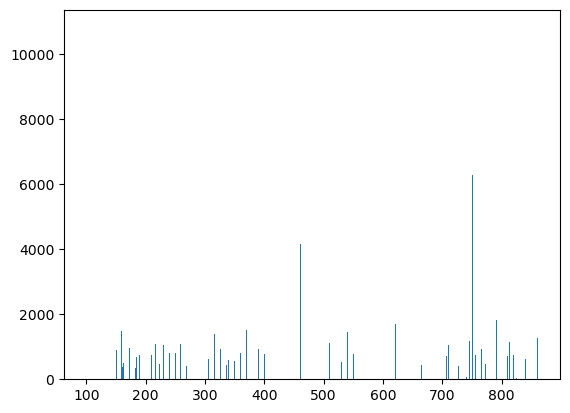

In [23]:
plt.bar(Init['HomeAdrMunCode'], Init['total'])
plt.show()

In [24]:
Init['total']= Init['total'].replace(0,0.01)

In [25]:
pd.set_option('display.max_rows', 200)
Init

,RespSex,HomeAdrMunCode,total
0,M,101,10181
1,M,147,1924
2,M,151,777
3,M,153,470
4,M,155,235
5,M,157,1165
6,M,159,1356
7,M,161,340
8,M,163,457
9,M,165,408


In [26]:
dimensions = [['RespSex'], ['HomeAdrMunCode']]
aggregates = [ag1, ag2]

IPF = ipfn.ipfn(Init, aggregates, dimensions)
df = IPF.iteration()

In [201]:
df

,HomeAdrMunCode,RespSex,total
0,101,M,260652.101503
1,147,M,41600.810248
2,151,M,18672.118492
3,153,M,13561.274595
4,155,M,5333.904319
5,157,M,29014.996328
6,159,M,26756.074103
7,161,M,9200.969909
8,163,M,11196.169082
9,165,M,10845.740907


In [202]:
income.groupby(['RespSex', 'HomeAdrMunCode'])['total'].sum()

RespSex  HomeAdrMunCode
K        101               271610.0
         147                46026.0
         151                20748.0
         153                14895.0
         155                 5992.0
         157                31658.0
         159                28115.0
         161                 9668.0
         163                12009.0
         165                11297.0
         167                21802.0
         169                21381.0
         173                23774.0
         175                17216.0
         183                 9368.0
         185                17510.0
         187                 6415.0
         190                17039.0
         201                10591.0
         210                17501.0
         217                27519.0
         219                22396.0
         223                10977.0
         230                23699.0
         240                18045.0
         250                19677.0
         253                21137.0
    

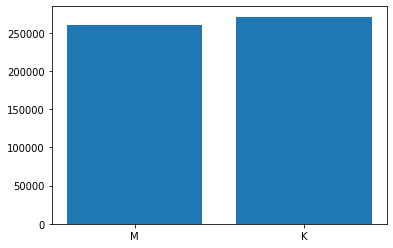

In [203]:
plt.bar(df['RespSex'], df['total'])
plt.show()

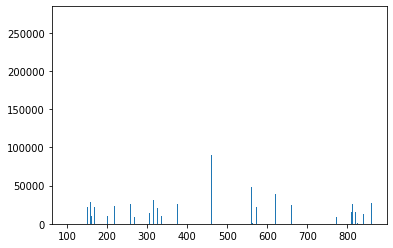

In [204]:
plt.bar(df['HomeAdrMunCode'], df['total'])
plt.show()

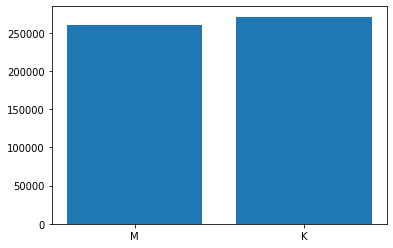

In [205]:
plt.bar(Init['RespSex'], Init['total'])
plt.show()

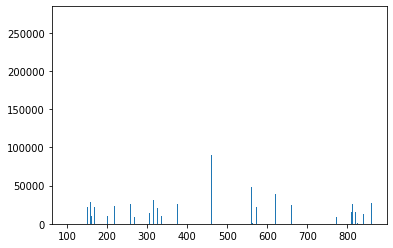

In [206]:
plt.bar(Init['HomeAdrMunCode'], Init['total'])
plt.show()

In [207]:
round(df['total'])

0      260652.0
1       41601.0
2       18672.0
3       13561.0
4        5334.0
5       29015.0
6       26756.0
7        9201.0
8       11196.0
9       10846.0
10      20351.0
11      21458.0
12      23001.0
13      15906.0
14       9433.0
15      16871.0
16       6353.0
17      16380.0
18       9855.0
19      16236.0
20      25830.0
21      20514.0
22       9131.0
23      22460.0
24      17703.0
25      19481.0
26      20817.0
27      25812.0
28      13254.0
29      36944.0
30       9429.0
31      16950.0
32      14242.0
33      28877.0
34      15872.0
35      21128.0
36      14063.0
37      33573.0
38      10344.0
39      12003.0
40      11315.0
41      17720.0
42      34906.0
43      26006.0
44      18690.0
45      17297.0
46      15533.0
47      17288.0
48      21736.0
49       9853.0
50      13183.0
51      81637.0
52      24019.0
53      12756.0
54       5226.0
55       2239.0
56      22319.0
57      11279.0
58      31194.0
59      14941.0
60      48480.0
61       1320.0
62      

In [208]:
df.loc[(df['RespSex']=='K') & (df['HomeAdrMunCode'] == 101)]

,HomeAdrMunCode,RespSex,total
98,101,K,271364.898497


In [209]:
session_all.loc[(session_all['RespSex']=='K') & (session_all['HomeAdrMunCode'] == 101)].sample(n=260652, replace=True, ignore_index=True)

,SessionId,InterviewType,DiaryDate,DiaryYear,PseudoYear,DiaryMonth,DiaryWeekday,DiaryDaytype,HomeAdrNUTS,HomeAdrMunCode,...,JstartMuncode,JstartGMMzone,JstartFareZone,JstartNearestStation,JstartDistNearestStation,DayJourneyType,DayPrimTargetMuncode,DayPrimTargetPurp,SessionWeight,WeightOver6
0,157750,2,14536,2009,2009/10,10,1,11,DK011,101,...,101.0,102342.0,NaN,Nordhavn,0.9,11,101.0,12.0,81.307029,NaN
1,311770,2,15718,2013,2012/13,1,7,32,DK011,101,...,NaN,NaN,NaN,NaN,NaN,1,101.0,1.0,515.422953,NaN
2,401219,2,17298,2017,2017/18,5,5,33,DK011,101,...,101.0,102342.0,NaN,Nordhavn,0.8,11,101.0,11.0,257.535644,240.682214
3,332070,2,16264,2014,2014/15,7,7,32,DK011,101,...,101.0,102353.0,NaN,Nordhavn,0.7,11,101.0,31.0,381.655168,NaN
4,427495,2,18009,2019,2018/19,4,2,11,DK011,101,...,101.0,103132.0,NaN,Christianshavn,1.1,11,101.0,31.0,205.880511,213.548431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260647,456566,2,18424,2020,2020/21,6,4,11,DK011,101,...,101.0,102723.0,NaN,Valby,0.2,11,163.0,11.0,161.654681,143.557016
260648,470683,2,18786,2021,2021/22,6,2,11,DK011,101,...,101.0,102653.0,NaN,Islev,0.1,11,175.0,31.0,157.492985,149.345008
260649,51258,2,13297,2006,2006/7,5,1,11,DK011,101,...,101.0,103172.0,NaN,Amagerbro,0.1,11,157.0,45.0,291.897132,NaN
260650,479810,2,19048,2022,2021/22,2,5,12,DK011,101,...,101.0,102454.0,NaN,Nørrebro,0.5,1,101.0,1.0,156.426126,166.309893


In [256]:
def sampleIPF(IPF, df):
    final = pd.DataFrame()
    for row in IPF.iterrows():
        new = df.loc[(df['RespSex']==row[1]['RespSex']) & (df['HomeAdrMunCode'] == row[1]['HomeAdrMunCode'])].sample(n=round(row[1]['total']), replace=True, ignore_index=True)
        final = pd.concat([final, new])
    return final

In [257]:
final = sampleIPF(df, session_all)

In [258]:
len(final)

4849122

In [259]:
final

,SessionId,InterviewType,DiaryDate,DiaryYear,PseudoYear,DiaryMonth,DiaryWeekday,DiaryDaytype,HomeAdrNUTS,HomeAdrMunCode,...,JstartMuncode,JstartGMMzone,JstartFareZone,JstartNearestStation,JstartDistNearestStation,DayJourneyType,DayPrimTargetMuncode,DayPrimTargetPurp,SessionWeight,WeightOver6
0,334283,0,16342,2014,2014/15,9,1,11,DK011,101,...,101.0,102651.0,NaN,Islev,0.9,11,101.0,11.0,281.673203,NaN
1,330910,2,16222,2014,2014/15,6,7,32,DK011,101,...,101.0,102452.0,NaN,Nørrebro,0.3,1,101.0,1.0,262.153187,NaN
2,195998,2,15019,2011,2010/11,2,1,11,DK011,101,...,101.0,102331.0,NaN,Svanemøllen,1.8,11,101.0,53.0,246.163862,NaN
3,317032,2,15889,2013,2013/14,7,3,11,DK011,101,...,NaN,NaN,NaN,NaN,NaN,1,101.0,1.0,884.155298,NaN
4,313694,2,15784,2013,2012/13,3,3,11,DK011,101,...,101.0,102731.0,NaN,Langgade,0.4,11,147.0,12.0,513.377316,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26936,318086,0,15924,2013,2013/14,8,3,11,DK050,860,...,860.0,860114.0,NaN,Vrå,10.4,11,860.0,41.0,466.673525,NaN
26937,460430,0,18506,2020,2020/21,9,2,11,DK050,860,...,860.0,860125.0,NaN,Sindal,1.6,11,813.0,11.0,590.647106,643.344202
26938,148789,2,14413,2009,2009/10,6,4,11,DK050,860,...,860.0,860125.0,NaN,Sindal,1.3,11,860.0,45.0,78.237420,NaN
26939,305578,2,15511,2012,2012/13,6,3,11,DK050,860,...,860.0,860123.0,NaN,Tolne,1.4,11,860.0,12.0,202.978245,NaN
